## Bollywood Movie Analysis
Author: Raunak Das

#### Meta-Data of the Bollywood Dataset:
- SINo - Identifier for the movies.
- Release Date - Date on which the movie was released.
- MovieName - Name of the movie.
- ReleaseTime - Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal).
- Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc
- Budget – Movie creation budget
- BoxOfficeCollection – Box office collection
- YoutubeViews – Number of views of the YouTube trailers
- YoutubeLikes – Number of likes of the YouTube trailers
- YoutubeDislikes – Number of dislikes of the YouTube trailers







ta visualization.

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('bollywood.csv')

In [3]:
df.head()


,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224


#### How many records are present in the dataset?

In [4]:
df.shape[0]

149

As we can see, there are 149 records in the dataset.

#### How many movies were released in each Release Time? Sort number of releases in Release Time in descending order.

In [7]:
df.ReleaseTime.value_counts()

ReleaseTime
N     99
HS    18
FS    17
LW    15
Name: count, dtype: int64

As we can see, the highest number of movies were released on a normal time, followed by the holiday season, the festive season, and then the long weekend having the lowest number of releases.

#### Which genre had highest number of releases during the Festive Season?

In [8]:
df.Genre = df.Genre.str.strip()

df[df.ReleaseTime=='FS'].Genre.value_counts()

Genre
Drama       4
Thriller    4
Action      3
Romance     3
Comedy      3
Name: count, dtype: int64

As we can see, the genres Thriller and Drama had the highest number of releases during the Festive Season, having 4 released each.



#### How many movies in each genre got released in different release times like long weekend, festive season, etc.


In [9]:
pd.crosstab(df.Genre, df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


As we can see, there are:

- 3 Action, 3 Comedy, 4 Drama, 3 Romance and 4 Thriller movies released during the Festive Season.
- 3 Action, 5 Comedy, 6 Drama, 3 Romance and 1 Thriller movies released during the Holiday Season.
- 3 Action, 5 Comedy, 1 Drama, 4 Romance and 2 Thriller movies released during the Long Weekend.
- 15 Action, 23 Comedy, 24 Drama, 15 Romance and 22 Thriller movies released during the Normal Period.


#### In which year were ma####um number movie released?


In [14]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format="%Y-%m-%d", errors='coerce')
df['Year'] = df['ReleaseDate'].dt.year
df['Year'].value_counts()

Year
2014    70
2013    67
2015    12
Name: count, dtype: int64

As we can see, the maximum number of movies were released in the year 2014.


 #### Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 30 crore or more?

In [15]:
df[df.Budget>=30]['ReleaseDate'].dt.month.value_counts()

ReleaseDate
2     8
8     7
1     6
11    6
6     5
7     5
10    4
9     4
4     3
3     3
5     3
12    2
Name: count, dtype: int64

As we can see, the month 2 - February typically sees most releases of high budgeted movies.


#### Which are the top 10 flop movies with minimum return on investment (ROI)?

In [16]:
df['ROI'] = (df.BoxOfficeCollection - df.Budget)/df.Budget

df.sort_values(by='ROI').MovieName[0:10]

9              Gangoobai
15               Bandook
53               SonaSpa
3        RajdhaniExpress
49     KyaDilliKyaLahore
121               Satya2
67           PuraniJeans
103         SamratandCo.
30             Heartless
102              Kaanchi
Name: MovieName, dtype: object

As we can see, the movies Gangoobai, Bandook, Sona Spa, Rajdhani Express, Kya Dilli Kya Lahore, Satya 2, Purani Jeans, Samrat and Co., Heartless, and Kaanchi have the minimum ROI and are the top 10 flop movies.



 #### Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.


In [17]:
df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

As we can see, movies which release on the long weekend and festive seasons have higher values of ROI - 1.12 and 0.97 respectively.




#### Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?


In [18]:
corr = df[['BoxOfficeCollection', 'YoutubeLikes']].corr()
corr

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


As we can see, the columns BoxOfficeCollection and YoutubeLikes have a moderate degree of positive linear correlation, having correlation coefficient 0.68. This means that if BoxOfficeCollection increases by 100%, the YoutubeLikes also increase by 68%.



#### Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.


<Axes: xlabel='Genre', ylabel='YoutubeViews'>

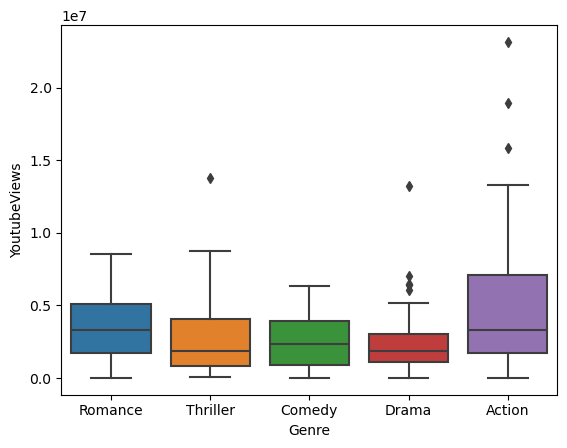

In [20]:
sns.boxplot(x='Genre', y='YoutubeViews', data=df)

As we can see, the Genre Action has the highest YouTube views.



#### Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?


<Axes: >

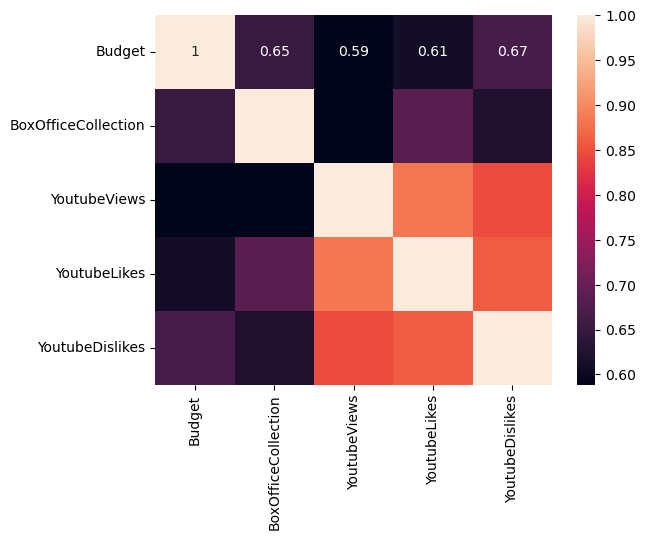

In [21]:
corr = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()

sns.heatmap(corr, annot=True)

As we can see, the columns YoutubeViews, YoutubeLikes, and YoutubeDislikes are highly correlated with each other.


#### During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.


<Axes: xlabel='Year', ylabel='BoxOfficeCollection'>

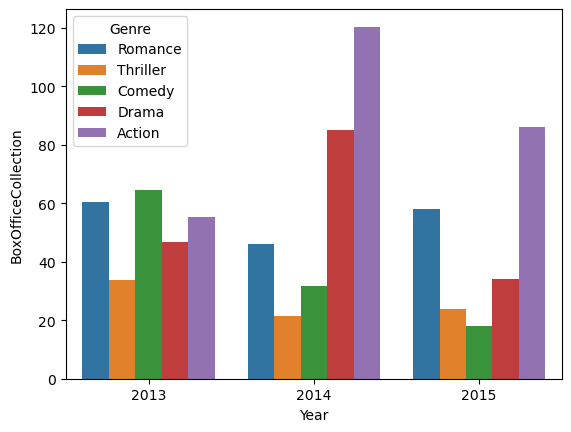

In [25]:
sns.barplot(x='Year', y='BoxOfficeCollection', hue='Genre', data=df, errorbar=None)

#### During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [26]:
df.Year.value_counts()

Year
2014    70
2013    67
2015    12
Name: count, dtype: int64

Next, we use the countplot() function from the Seaborn library and pass the value Year to be plotted on the x-axis. The y-axis automatically plots the count of the discrete variable Year.


<Axes: xlabel='Year', ylabel='count'>

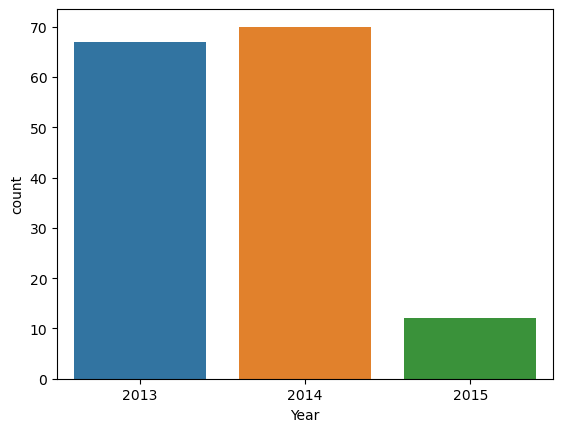

In [27]:
sns.countplot(x='Year', data=df)

As we can see, the year 2014 has the maximum number of movies closely followed by 2013.


#### Find the distribution of movie budget for every Genre.

In [31]:
df['Budget'] = df['Budget'].replace([np.inf, -np.inf], np.nan)

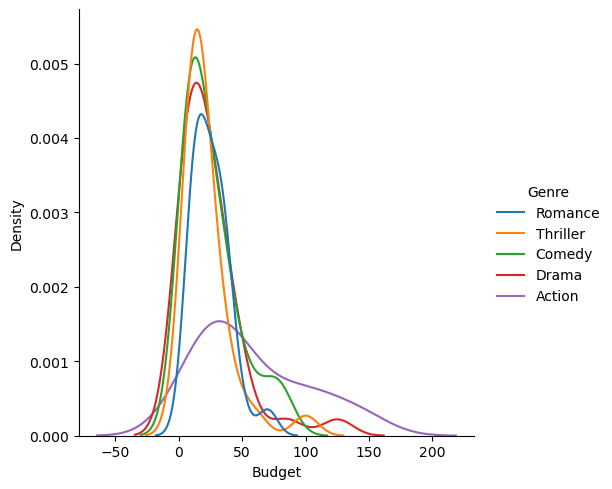

In [35]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
df['Budget'] = df['Budget'].replace([np.inf, -np.inf], np.nan)
sns.displot(x='Budget', data=df, kind='kde', hue='Genre')


#### During 2013−2015, Visualize the number of YouTube likes and YouTube dislikes every year. Also, visualize with best fit graph.


In [36]:
df.groupby(by='Year').YoutubeLikes.sum()

Year
2013    324180
2014    710142
2015    139431
Name: YoutubeLikes, dtype: int64

Then, we find the sum of dislikes year-wise by grouping the dataframe by the Year column and summing over the YoutubeDislikes column using the sum() function from the Pandas library.



In [37]:
df.groupby(by='Year').YoutubeDislikes.sum()

Year
2013     58156
2014    104682
2015     17127
Name: YoutubeDislikes, dtype: int64

Next, we convert the above results into a data frame using the DataFrame() function from the Pandas libray and plot it using the plot.bar() from the Pandas library.

<Axes: >

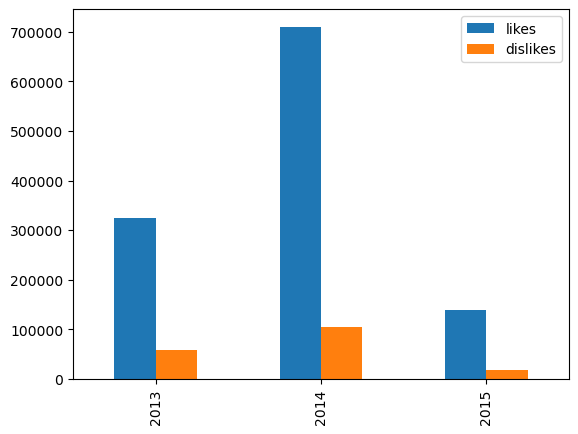

In [38]:
likes = [324180, 710142, 139431]
dislikes = [58156, 104682, 17127]
year = ['2013', '2014', '2015']

compare = pd.DataFrame({'likes':likes, 'dislikes':dislikes}, index=year)

compare.plot.bar()